Note book tiến hành thuật toán K means trong bài toán nhận diện chữ viết tay

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.datasets import mnist
from sklearn.cluster import KMeans
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Giảm shape từ 60000x28x28 -> 60000x784
x = x_train.reshape(x_train.shape[0],-1)
x = x/256.
#fit với model Kmeans
K=10;
kmeans = KMeans(n_clusters=K).fit(x)

#dự đoán
y_pred = kmeans.predict(x)



11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hàm display_network vẽ ảnh ở dạng ma trận thông số đầu vào (A,m,n):

    A là ma trận với 1 cột của A là 1 ảnh, trong trường hợp này A có shape là: (784,i) với mối ảnh có 784 pixcel và i ảnh

    m,n là số hàng và số cột muốn hiển thị

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# A là ma trận với 1 cột của A là 1 ảnh (ảnh ở dạng vector cột, chưa reshape)
# This function visualizes filters in matrix A. Each column of A is a
# filter. We will reshape each column into a square image and visualizes
# on each cell of the visualization panel.
# All other parameters are optional, usually you do not need to worry
# about it.
# opt_normalize: whether we need to normalize the filter so that all of
# them can have similar contrast. Default value is true.
# opt_graycolor: whether we use gray as the heat map. Default is true.
# opt_colmajor: you can switch convention to row major for A. In that
# case, each row of A is a filter. Default value is false.
# source: https://github.com/tsaith/ufldl_tutorial

def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True

    # Rescale
    A = A - np.average(A)

    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)


    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))

    if not opt_graycolor:
        image *= 0.1

    k = 0

    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue

            clim = np.max(np.abs(A[:, k]))

            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1

    return image

def display_color_network(A):
    """
    # display receptive field(s) or basis vector(s) for image patches
    #
    # A         the basis, with patches as column vectors

    # In case the midpoint is not set at 0, we shift it dynamically

    :param A:
    :param file:
    :return:
    """
    if np.min(A) >= 0:
        A = A - np.mean(A)

    cols = np.round(np.sqrt(A.shape[1]))

    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1
    rows = np.ceil(A.shape[1] / cols)

    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]

    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))

    # Initialization of the image
    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))

    for i in range(int(rows)):
        for j in range(int(cols)):
            # This sets the patch
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols + j].reshape(dim, dim)

    image = (image + 1) / 2

    #PIL.Image.fromarray(np.uint8(image * 255), 'RGB').save(filename)

    return image


Sắp xếp các ảnh vào ma trận A theo thứ tự:

10 hàng ngang

Mỗi hàng bắt đầu là center của cluster và 10 ảnh ngẫu nhiên có nhãn là center đó



In [3]:
A = np.empty([0, x[0].shape[0]])
for i in range(10):
  # reshape center từ (784,) thành (1,784) để nối vào 10 ảnh ngẫu nhiên của mỗi nhóm
  center = kmeans.cluster_centers_[i].reshape(1,len(kmeans.cluster_centers_[i]))
  # np.asarray(np.where(y_pred ==i)).shape có shape là (1, 6526) phải reshape thành (6526,) là số lượng các phần tử có nhãn i
  #lấy 10 phần tử ngẫu nhiên trong số đó
  x_random = x[np.random.choice(np.asarray(np.where(y_pred ==i)).reshape(-1),10)]
  A = np.append(A, center, axis = 0)
  A = np.append(A, x_random, axis = 0)

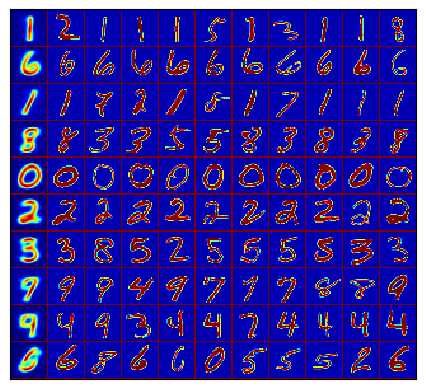

In [4]:
#hiển thị
# chuyển vị A từ ma trận (110x784) thành (784,110) 1 cột gồm 784 điểm ảnh, và gồm 110 cột
I = display_network(A.T, 10, 11)
f1 = plt.imshow(I, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()